In [3]:
import pandas as pd
df=pd.read_csv("C://Users//Subhaan khokhar//Downloads//archive (1)//Food_Recipe.csv")
df.head()

,name,description,cuisine,course,diet,ingredients_name,ingredients_quantity,prep_time (in mins),cook_time (in mins),instructions,image_url
0,Creamy Veg Spring Roll Recipe,Creamy Veg Spring Roll Recipe is a delicious c...,Continental,Snack,Vegetarian,"Spring Roll Wrappers, All Purpose Flour (Maida...","4 Spring Roll Wrappers , homemade 4 tablespoo...",30.0,45.0,To begin making the Creamy Veg Spring Roll Rec...,https://www.archanaskitchen.com/images/archana...
1,Goan Style Mushroom Vindaloo Recipe,Goan Style Mushroom Vindaloo Recipe is a varia...,Goan Recipes,Dinner,Vegetarian,"Button mushrooms, Onion, Garlic, Ginger, Turme...","250 grams Button mushrooms , cut into quarters...",20.0,30.0,To begin making the Goan Style Mushroom Vindal...,https://www.archanaskitchen.com/images/archana...
2,Athirasam Recipe (A Traditional South Indian D...,Adhirasam is a delicious and crisp sweet dish ...,South Indian Recipes,Dessert,Vegetarian,"Rice, Jaggery, Fresh coconut, Black sesame see...",1-1/2 cup Rice 1 cup Jaggery 1/4 cup Fresh c...,20.0,30.0,Start the preparation of Athirasam Recipe (A T...,https://www.archanaskitchen.com/images/archana...
3,Roasted Eggplant In Peanut Curry Spiced With S...,Roasted Eggplant in Peanut Curry was a dish th...,Asian,Main Course,Vegetarian,"Brinjal (Baingan / Eggplant), Peanut Butter, C...","1 Brinjal (Baingan / Eggplant) , cut into inch...",20.0,30.0,To begin making Roasted Eggplant In Peanut Cur...,https://www.archanaskitchen.com/media/k2/items...
4,Kerala Style Taroo Root Curry Recipe (Colacasia),Kerala Style Taro Root Curry uses Arbi which ...,Kerala Recipes,Lunch,Vegetarian,"Colocasia root (Arbi), Tamarind, Salt, Fresh c...","250 grams Colocasia root (Arbi) , washed thoro...",15.0,25.0,To begin making the Kerala style Taro root cur...,https://www.archanaskitchen.com/images/archana...


### Data cleaning & Preprocessing 

In [58]:
# Keep essential and useful optional columns

df = df[['name', 'ingredients_name', 'instructions', 'cuisine', 'course', 'diet', 'cook_time (in mins)']]
df.head()

,name,ingredients_name,instructions,cuisine,course,diet,cook_time (in mins)
0,creamy veg spring roll recipe,"spring roll wrappers, all purpose flour maida,...",to begin making the creamy veg spring roll rec...,continental,snack,vegetarian,45.0
1,goan style mushroom vindaloo recipe,"button mushrooms, onion, garlic, ginger, turme...",to begin making the goan style mushroom vindal...,goan recipes,dinner,vegetarian,30.0
2,athirasam recipe (a traditional south indian d...,"rice, jaggery, fresh coconut, black sesame see...",start the preparation of athirasam recipe (a t...,south indian recipes,dessert,vegetarian,30.0
3,roasted eggplant in peanut curry spiced with s...,"brinjal baingan eggplant, peanut butter, cocon...",to begin making roasted eggplant in peanut cur...,asian,main course,vegetarian,30.0
4,kerala style taroo root curry recipe (colacasia),"colocasia root arbi, tamarind, salt, fresh coc...",to begin making the kerala style taro root cur...,kerala recipes,lunch,vegetarian,25.0


In [5]:
# Remove rows where essential data is missing
df.dropna(subset=['name', 'ingredients_name', 'instructions'], inplace=True)


In [59]:
# Fill missing values in optional columns with 'Unknown'
df['cuisine'].fillna('Unknown', inplace=True)
df['course'].fillna('Unknown', inplace=True)
df['diet'].fillna('Unknown', inplace=True)
df['cook_time (in mins)'].fillna('Unknown', inplace=True)


In [60]:
print("\nMissing values in dataset:")
print()
print(df.isnull().sum())


Missing values in dataset:

name                   0
ingredients_name       0
instructions           0
cuisine                0
course                 0
diet                   0
cook_time (in mins)    0
dtype: int64


In [62]:
# Convert text columns to lowercase for consistency
df['name'] = df['name'].str.strip().str.lower()
df['ingredients_name'] = df['ingredients_name'].str.strip().str.lower()
df['instructions'] = df['instructions'].str.strip().str.lower()
df['cuisine'] = df['cuisine'].str.strip().str.lower()
df['course'] = df['course'].str.strip().str.lower()
df['diet'] = df['diet'].str.strip().str.lower()

In [63]:
# Remove exact duplicate rows (keeping the first occurrence)
df.drop_duplicates(subset=['name', 'ingredients_name', 'instructions'], keep='first', inplace=True)

# Reset index after dropping duplicates
df.reset_index(drop=True, inplace=True)

df.head()

,name,ingredients_name,instructions,cuisine,course,diet,cook_time (in mins)
0,creamy veg spring roll recipe,"spring roll wrappers, all purpose flour maida,...",to begin making the creamy veg spring roll rec...,continental,snack,vegetarian,45.0
1,goan style mushroom vindaloo recipe,"button mushrooms, onion, garlic, ginger, turme...",to begin making the goan style mushroom vindal...,goan recipes,dinner,vegetarian,30.0
2,athirasam recipe (a traditional south indian d...,"rice, jaggery, fresh coconut, black sesame see...",start the preparation of athirasam recipe (a t...,south indian recipes,dessert,vegetarian,30.0
3,roasted eggplant in peanut curry spiced with s...,"brinjal baingan eggplant, peanut butter, cocon...",to begin making roasted eggplant in peanut cur...,asian,main course,vegetarian,30.0
4,kerala style taroo root curry recipe (colacasia),"colocasia root arbi, tamarind, salt, fresh coc...",to begin making the kerala style taro root cur...,kerala recipes,lunch,vegetarian,25.0


### Feature Engineering:

In [64]:
import re                                                      # used for text cleaning
from sklearn.feature_extraction.text import TfidfVectorizer    # convert text to numbers


# Function to clean ingredients further (if needed)
def clean_ingredients(text):
    
    text = re.sub(r'[^a-zA-Z, ]', '', text)   # Remove special characters
    return text.strip().replace("  ", " ")    # Remove extra spaces

# Apply cleaning function (in case some noise is still present)
df['ingredients_name'] = df['ingredients_name'].apply(clean_ingredients)

# Convert ingredient lists into a single string for TF-IDF
df['ingredients_cleaned'] = df['ingredients_name'].apply(lambda x: ' '.join(x.split(',')))

# Initialize TF-IDF Vectorizer (removing English stopwords)
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the cleaned ingredients column
X = vectorizer.fit_transform(df['ingredients_cleaned'])

# Display the shape of the transformed dataset
print("TF-IDF Vectorization Complete! Shape:", X.shape)


TF-IDF Vectorization Complete! Shape: (5645, 1178)


### Model: 

In [104]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_recipes(user_ingredients, df, X, vectorizer):
    
    # Convert user ingredients into a TF-IDF vector
    user_ingredients = clean_ingredients(user_ingredients)
    user_vector = vectorizer.transform([user_ingredients])

    # Compute similarity with all recipes
    similarity_scores = cosine_similarity(user_vector, X)[0]

    # Get top 5 similar recipes (without using argsort)
    top_recipes = []
    for i in range(len(similarity_scores)):
        top_recipes.append((i, similarity_scores[i]))  # Store index and similarity score
    
    # Sort recipes based on similarity (highest first)
    top_recipes.sort(key=lambda x: x[1], reverse=True)  

    # Get the top 5 recipes
    recommended_recipes = []
    for i in range(5):
        recommended_recipes.append(df.iloc[top_recipes[i][0]])

    return recommended_recipes

# Example: User provides ingredients
user_ingredients = "tomato, cheese, garlic, basil"

# Ask user for preferences
user_cuisine = input("Enter preferred cuisine (or press Enter to skip): ").strip().lower()
user_diet = input("Enter preferred diet (or press Enter to skip): ").strip().lower()
user_course = input("Enter preferred course (or press Enter to skip): ").strip().lower()

recommended_recipes = recommend_recipes(user_ingredients, df, X, vectorizer)

# Apply filters based on user preferences
filtered_recipes = [
    recipe for recipe in recommended_recipes
    if (not user_cuisine or recipe["cuisine"] == user_cuisine) and
       (not user_diet or recipe["diet"] == user_diet) and
       (not user_course or recipe["course"] == user_course)
]

# Show filtered recipes if available, otherwise show original recommendations
recommended_recipes = filtered_recipes if filtered_recipes else recommended_recipes

# Print recommendations
if recommended_recipes:
    print("\n🍽️ Recipes matching your ingredients:\n")
    
    for recipe in recommended_recipes:
        print("🍕 Recipe Name:", recipe["name"].title())
        print("🌍 Cuisine:", recipe["cuisine"].title())
        print("🍽️ Course:", recipe["course"].title())
        print("🥗 Diet:", recipe["diet"].title())
        print("⏳ Cook Time:", recipe["cook_time (in mins)"], "mins")
        print("🛒 Ingredients:", recipe["ingredients_name"])
        
        # Split instructions into steps using only '.'
        steps = recipe["instructions"].split('.')
        print("\n📜 Cooking Instructions:")
        print(" ")
        
        step_number = 1
        for step in steps:
            step = step.strip()  # Remove extra spaces
            if step:  # Skip empty steps
                print(f"   🔹 Step {step_number}: {step.capitalize()}.")
                step_number += 1
                
        print(" ")        
        print("➖" * 50)  # Separator
        print(" ")

else:
    print("❌ No matching recipes found. Try different ingredients.")


Enter preferred cuisine (or press Enter to skip): 
Enter preferred diet (or press Enter to skip): 
Enter preferred course (or press Enter to skip): 

🍽️ Recipes matching your ingredients:

🍕 Recipe Name: High Protein Spinach Basil & Cheese Omelette Recipe
🌍 Cuisine: French
🍽️ Course: World Breakfast
🥗 Diet: Vegetarian
⏳ Cook Time: 30.0 mins
🛒 Ingredients: whole egg, milk, green chilli, garlic, basil leaves, oil, salt and pepper, spinach, sweet corn, tomato, garlic, cheese

📜 Cooking Instructions:
 
   🔹 Step 1: To begin making the high protein spinach basil & cheese omelette recipe , first prep all the ingredients and keep it ready.
   🔹 Step 2: Whisk the egg whites along with salt, pepper and milk, keep aside.
   🔹 Step 3: Heat oil in a skillet, add garlic, green chilli, spinach and sweet corn and slightly saute it for 3 minutes until the spinach has softened and all the moisture has evaporated.
   🔹 Step 4: In a small shallow pan add the beaten egg, season it with salt and pepper.
  

### Visulaization & Charts 

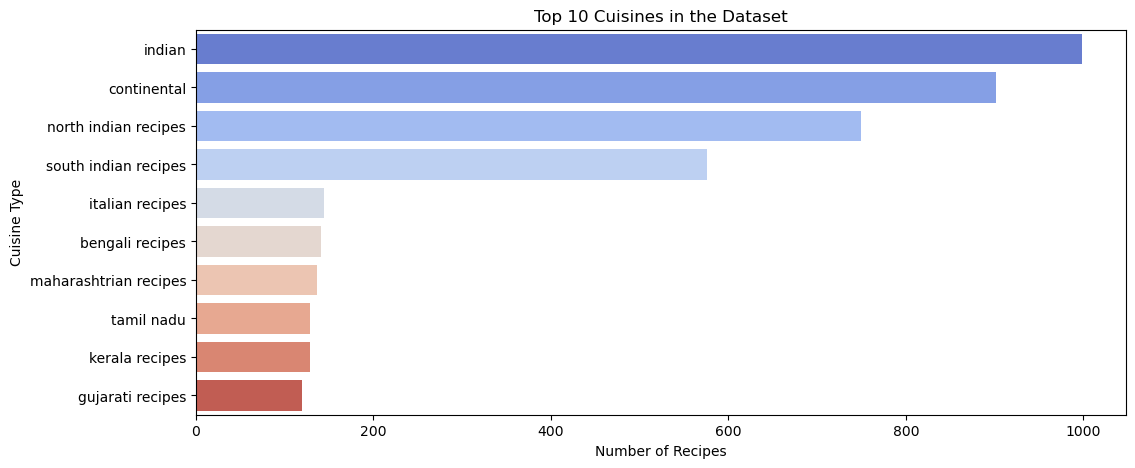

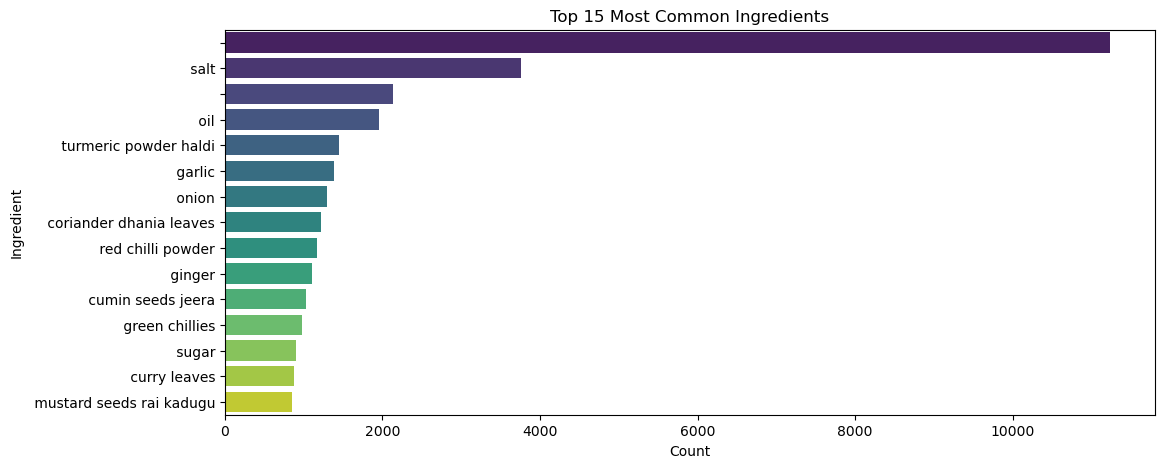

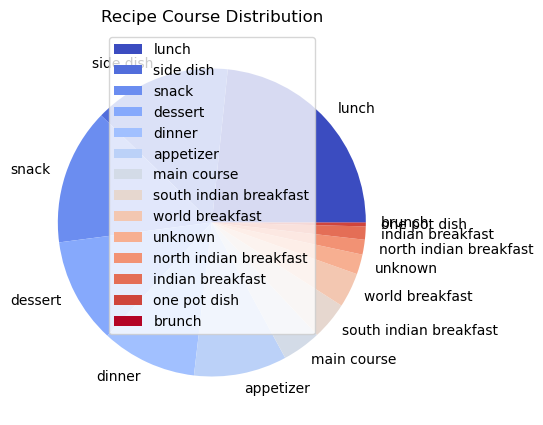

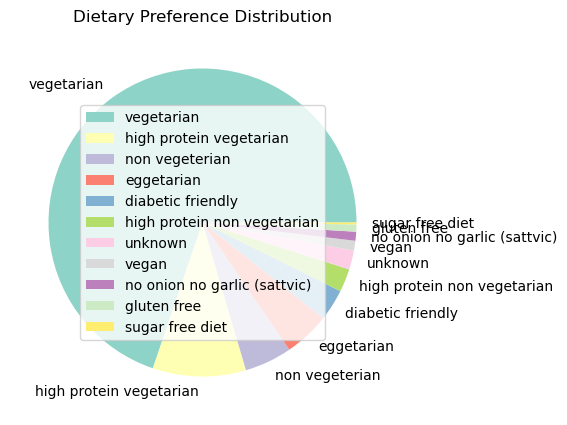

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 1. Cuisine Distribution (Top 10 cuisines)
plt.figure(figsize=(12,5))
sns.countplot(y=df['cuisine'], order=df['cuisine'].value_counts().index[:10], palette="coolwarm")
plt.xlabel("Number of Recipes")
plt.ylabel("Cuisine Type")
plt.title("Top 10 Cuisines in the Dataset")
plt.show()

print(" ")

# 📊 2. Most Common Ingredients
df['ingredients_name'] = df['ingredients_name'].fillna('')
all_ingredients = pd.Series(','.join(df['ingredients_name']).split(','))
ingredient_counts = all_ingredients.value_counts().reset_index()
ingredient_counts.columns = ['Ingredient', 'Count']
common_ingredients = ingredient_counts.head(15)

plt.figure(figsize=(12, 5))
sns.barplot(y=common_ingredients['Ingredient'], x=common_ingredients['Count'], palette="viridis")
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.title("Top 15 Most Common Ingredients")
plt.show()

print(" ")

# 📊 3. Recipe Course Distribution
plt.figure(figsize=(8, 5))
df['course'].value_counts().plot(kind='pie', cmap='coolwarm', legend=True)  
plt.ylabel("")
plt.title("Recipe Course Distribution")
plt.show()

print(" ")

# 📊 4. Dietary Preference Distribution
plt.figure(figsize=(8,5))
df['diet'].value_counts().plot(kind='pie', legend=True, cmap='Set3')
plt.ylabel("")
plt.title("Dietary Preference Distribution")
plt.show()